In [1]:
#pip install super-gradients==3.2.0

     |████████████████████████████████| 6.4 MB 143 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 139 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 154 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.2 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 7.0 MB 248 kB/s eta 0:00:01
     |████████████████████████████████| 408 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 835 kB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 62.5 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 223 kB/s

In [1]:
import torch
torch.__version__

'2.3.1+cu121'

In [2]:
torch.cuda.get_device_name()

'NVIDIA GeForce RTX 2080'

In [14]:
MODEL_ARCH = 'yolo_nas_m' #nombre del modelo
BATCH_SIZE = 5 #cuantas imágenes a la vez ve el modelo
MAX_EPOCHS = 30 #cuantas veces el model va a mirar el dataset
EPOCHS = 30
CHECKPOINT_DIR = '/home/balarcon/Palma/resultados' #ruta de la carpeta de resultado
EXPERIMENT_NAME = "Cascos"

In [4]:
from super_gradients.training import Trainer 

#Set trainer 
trainer = Trainer(
    experiment_name=EXPERIMENT_NAME,
    ckpt_root_dir=CHECKPOINT_DIR
)

[2024-07-09 22:52:00] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /home/balarcon/sg_logs/console.log


[2024-07-09 22:52:01] WARNING - __init__.py - Failed to import pytorch_quantization
2024-07-09 22:52:02.331373: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 22:52:03.078387: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024-07-09 22:52:04] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-07-09 22:52:04] WARNING - export.py - Failed to import pytorch_quantization
[2024-07-09 22:52:04] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


In [5]:
#pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 631.5 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 709.3 kB/s eta 0:00:000:00:01


Note: you may need to restart the kernel to use updated packages.


In [1]:
'''from roboflow import Roboflow
rf = Roboflow(api_key="nzp8Hw8wNQsf5de7gAwA")
project = rf.workspace("innovatech").project("motorcycle-helmet-q0wmd")
version = project.version(1)
dataset = version.download("yolov8")'''

loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

In [5]:
#direcciones y rutas de las carpetas de imágenes y etiquetas de entrenamiento, validación y testeo

dataset_params = {


    'data_dir': '/home/balarcon/Palma/Motorcycle-helmet-1',
    'train_images_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/train/images',
    'train_labels_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/train/labels',


    'val_images_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/valid/images',
    'val_labels_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/valid/labels',
    
    
    'test_images_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/test/images',
    'test_labels_dir': '/home/balarcon/Palma/Motorcycle-helmet-1/test/labels',


    'classes': ['helmet','no helmet']

}

In [15]:
# Importing Data Loaders: training and valdition
from super_gradients.training.dataloaders.dataloaders import (
    coco_detection_yolo_format_train, coco_detection_yolo_format_val)

# Setting up Training Data Loader
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size': BATCH_SIZE,
        'num_workers': 2
    }
)

[2024-07-09 23:07:45] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 1110/1110 [00:00<00:00, 6416.33it/s]
[2024-07-09 23:07:46] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.
Indexing dataset annotations: 100%|██████████| 105/105 [00:00<00:00, 6017.08it/s]
[2024-07-09 23:07:46] INFO - detection_dataset.py - Dataset Initialization in progress. `cache_annotations=True` causes the process to take longer due to full dataset indexing.


Indexing dataset annotations: 100%|██████████| 53/53 [00:00<00:00, 5855.34it/s]


In [16]:
train_data.dataset.dataset_params['transforms'][1]

{'DetectionRandomAffine': {'degrees': 10.0, 'translate': 0.1, 'scales': [0.1, 2], 'shear': 2.0, 'target_size': [640, 640], 'filter_box_candidates': True, 'wh_thr': 2, 'area_thr': 0.1, 'ar_thr': 20}}

In [10]:
train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 0

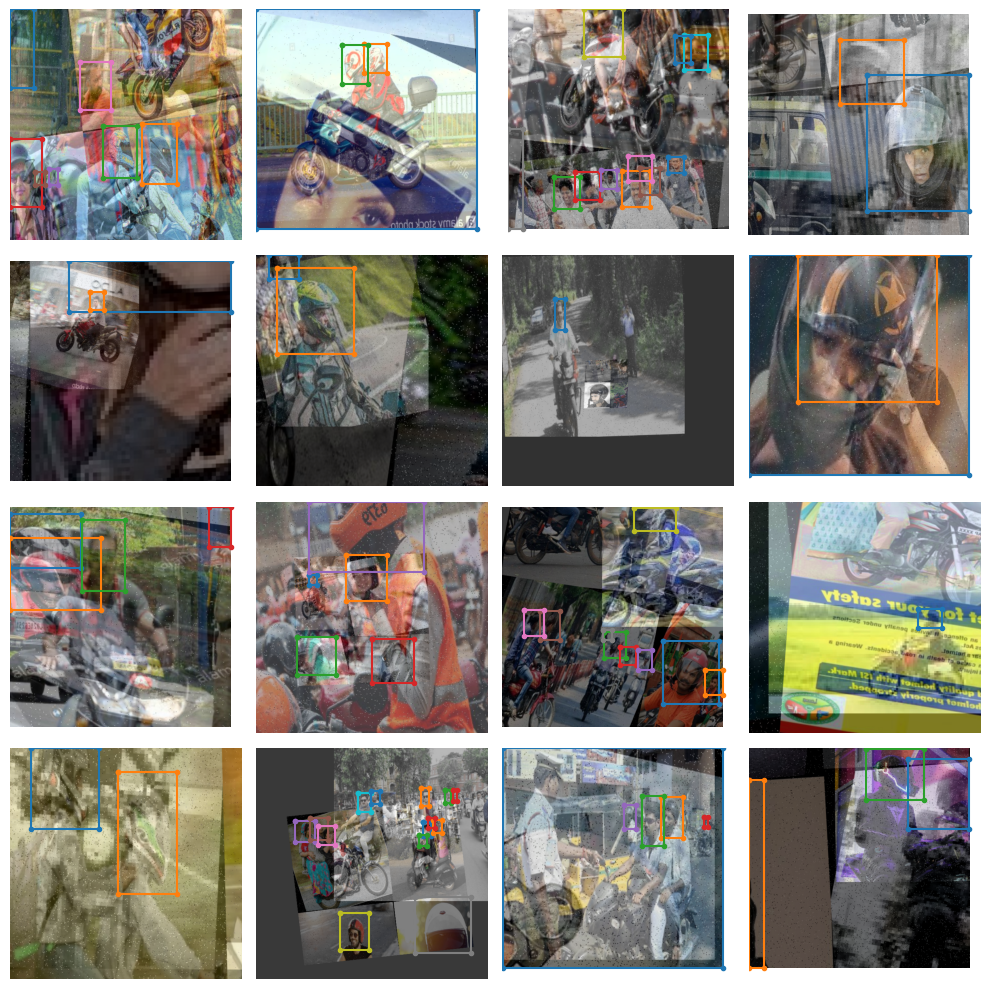

In [17]:
train_data.dataset.plot()

In [18]:
from super_gradients.training import models

model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    pretrained_weights="coco"
)

[2024-07-09 23:08:16] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-07-09 23:08:16] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [13]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

In [19]:
train_params = {
    # ENABLING SILENT MODE SET True if you want
    'silent_mode': False,
    "average_best_models": True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 5,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "SGD",
    "optimizer_params": {"weight_decay": 0.0002},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": MAX_EPOCHS,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.015,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.8
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [20]:
'''trainer.train(
    model=model,
    training_params=train_params,
    train_loader=train_data,
    valid_loader=val_data
)'''

The console stream is now moved to /home/balarcon/Palma/resultados/Cascos/console_jul09_23_10_00.txt


[2024-07-09 23:10:01] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
[2024-07-09 23:10:02] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 1104       (len(train_set))
    - Batch size per GPU:           5          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             5          (num_gpus * batch_size)
    - Effective Batch size:         5          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         220        (len(train_loader))
    - Gradient updates per epoch:   220        (len(train_loader) / batch_accumulate)

[2024-07-09 23:10:02] INFO - sg_trainer.py - Started training for 30 epochs (0/29)

Validating: 100%|██████████| 21/21 [00:02<00:00,  7.48it/s]
[2024-07-09 23:11:17] INFO - base_sg_logger.py 

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.9846
│   ├── Ppyoloeloss/loss_iou = 0.3605
│   ├── Ppyoloeloss/loss_dfl = 1.9158
│   └── Ppyoloeloss/loss = 3.8437
└── Validation
    ├── Ppyoloeloss/loss_cls = 2.0683
    ├── Ppyoloeloss/loss_iou = 0.345
    ├── Ppyoloeloss/loss_dfl = 1.9157
    ├── Ppyoloeloss/loss = 3.8887
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0004
    └── F1@0.50 = 0.0



Validating epoch 1: 100%|██████████| 21/21 [00:02<00:00,  7.71it/s]
[2024-07-09 23:12:29] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:12:29] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.2554263770580292


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.4529
│   │   ├── Epoch N-1      = 1.9846 (↘ -0.5317)
│   │   └── Best until now = 1.9846 (↘ -0.5317)
│   ├── Ppyoloeloss/loss_iou = 0.3018
│   │   ├── Epoch N-1      = 0.3605 (↘ -0.0586)
│   │   └── Best until now = 0.3605 (↘ -0.0586)
│   ├── Ppyoloeloss/loss_dfl = 1.732
│   │   ├── Epoch N-1      = 1.9158 (↘ -0.1838)
│   │   └── Best until now = 1.9158 (↘ -0.1838)
│   └── Ppyoloeloss/loss = 3.0734
│       ├── Epoch N-1      = 3.8437 (↘ -0.7702)
│       └── Best until now = 3.8437 (↘ -0.7702)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.2948
    │   ├── Epoch N-1      = 2.0683 (↘ -0.7735)
    │   └── Best until now = 2.0683 (↘ -0.7735)
    ├── Ppyoloeloss/loss_iou = 0.2642
    │   ├── Epoch N-1      = 0.345  (↘ -0.0808)
    │   └── Best until now = 0.345  (↘ -0.0808)
    ├── Ppyoloeloss/loss_dfl = 1.5936
    │   ├── Epoch N-1      = 1.9157 (↘ -0.3221)
    │   └── Best until now = 1.9157 (↘ -0.3221)
    ├── Ppyoloeloss/los

Validating epoch 2: 100%|██████████| 21/21 [00:02<00:00,  7.68it/s]
[2024-07-09 23:13:42] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:13:42] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.38766932487487793


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.2572
│   │   ├── Epoch N-1      = 1.4529 (↘ -0.1957)
│   │   └── Best until now = 1.4529 (↘ -0.1957)
│   ├── Ppyoloeloss/loss_iou = 0.2598
│   │   ├── Epoch N-1      = 0.3018 (↘ -0.042)
│   │   └── Best until now = 0.3018 (↘ -0.042)
│   ├── Ppyoloeloss/loss_dfl = 1.5172
│   │   ├── Epoch N-1      = 1.732  (↘ -0.2148)
│   │   └── Best until now = 1.732  (↘ -0.2148)
│   └── Ppyoloeloss/loss = 2.6654
│       ├── Epoch N-1      = 3.0734 (↘ -0.4081)
│       └── Best until now = 3.0734 (↘ -0.4081)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1747
    │   ├── Epoch N-1      = 1.2948 (↘ -0.1201)
    │   └── Best until now = 1.2948 (↘ -0.1201)
    ├── Ppyoloeloss/loss_iou = 0.2479
    │   ├── Epoch N-1      = 0.2642 (↘ -0.0163)
    │   └── Best until now = 0.2642 (↘ -0.0163)
    ├── Ppyoloeloss/loss_dfl = 1.4839
    │   ├── Epoch N-1      = 1.5936 (↘ -0.1097)
    │   └── Best until now = 1.5936 (↘ -0.1097)
    ├── Ppyoloeloss/loss

Validating epoch 3: 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]
[2024-07-09 23:14:56] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:14:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4366152882575989


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.211
│   │   ├── Epoch N-1      = 1.2572 (↘ -0.0461)
│   │   └── Best until now = 1.2572 (↘ -0.0461)
│   ├── Ppyoloeloss/loss_iou = 0.2499
│   │   ├── Epoch N-1      = 0.2598 (↘ -0.0099)
│   │   └── Best until now = 0.2598 (↘ -0.0099)
│   ├── Ppyoloeloss/loss_dfl = 1.4174
│   │   ├── Epoch N-1      = 1.5172 (↘ -0.0999)
│   │   └── Best until now = 1.5172 (↘ -0.0999)
│   └── Ppyoloeloss/loss = 2.5445
│       ├── Epoch N-1      = 2.6654 (↘ -0.1209)
│       └── Best until now = 2.6654 (↘ -0.1209)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1484
    │   ├── Epoch N-1      = 1.1747 (↘ -0.0264)
    │   └── Best until now = 1.1747 (↘ -0.0264)
    ├── Ppyoloeloss/loss_iou = 0.2458
    │   ├── Epoch N-1      = 0.2479 (↘ -0.0022)
    │   └── Best until now = 0.2479 (↘ -0.0022)
    ├── Ppyoloeloss/loss_dfl = 1.4153
    │   ├── Epoch N-1      = 1.4839 (↘ -0.0686)
    │   └── Best until now = 1.4839 (↘ -0.0686)
    ├── Ppyoloeloss/los

Validating epoch 4: 100%|██████████| 21/21 [00:02<00:00,  7.63it/s]
[2024-07-09 23:16:13] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:16:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.4769817590713501


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.201
│   │   ├── Epoch N-1      = 1.211  (↘ -0.01)
│   │   └── Best until now = 1.211  (↘ -0.01)
│   ├── Ppyoloeloss/loss_iou = 0.2384
│   │   ├── Epoch N-1      = 0.2499 (↘ -0.0115)
│   │   └── Best until now = 0.2499 (↘ -0.0115)
│   ├── Ppyoloeloss/loss_dfl = 1.3869
│   │   ├── Epoch N-1      = 1.4174 (↘ -0.0304)
│   │   └── Best until now = 1.4174 (↘ -0.0304)
│   └── Ppyoloeloss/loss = 2.4906
│       ├── Epoch N-1      = 2.5445 (↘ -0.0539)
│       └── Best until now = 2.5445 (↘ -0.0539)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.087
    │   ├── Epoch N-1      = 1.1484 (↘ -0.0614)
    │   └── Best until now = 1.1484 (↘ -0.0614)
    ├── Ppyoloeloss/loss_iou = 0.2484
    │   ├── Epoch N-1      = 0.2458 (↗ 0.0027)
    │   └── Best until now = 0.2458 (↗ 0.0027)
    ├── Ppyoloeloss/loss_dfl = 1.4075
    │   ├── Epoch N-1      = 1.4153 (↘ -0.0078)
    │   └── Best until now = 1.4153 (↘ -0.0078)
    ├── Ppyoloeloss/loss = 2.4

Validating epoch 5: 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]
[2024-07-09 23:17:30] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:17:30] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5138501524925232


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1616
│   │   ├── Epoch N-1      = 1.201  (↘ -0.0394)
│   │   └── Best until now = 1.201  (↘ -0.0394)
│   ├── Ppyoloeloss/loss_iou = 0.2358
│   │   ├── Epoch N-1      = 0.2384 (↘ -0.0027)
│   │   └── Best until now = 0.2384 (↘ -0.0027)
│   ├── Ppyoloeloss/loss_dfl = 1.327
│   │   ├── Epoch N-1      = 1.3869 (↘ -0.06)
│   │   └── Best until now = 1.3869 (↘ -0.06)
│   └── Ppyoloeloss/loss = 2.4145
│       ├── Epoch N-1      = 2.4906 (↘ -0.0761)
│       └── Best until now = 2.4906 (↘ -0.0761)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0663
    │   ├── Epoch N-1      = 1.087  (↘ -0.0207)
    │   └── Best until now = 1.087  (↘ -0.0207)
    ├── Ppyoloeloss/loss_iou = 0.2444
    │   ├── Epoch N-1      = 0.2484 (↘ -0.004)
    │   └── Best until now = 0.2458 (↘ -0.0013)
    ├── Ppyoloeloss/loss_dfl = 1.4211
    │   ├── Epoch N-1      = 1.4075 (↗ 0.0136)
    │   └── Best until now = 1.4075 (↗ 0.0136)
    ├── Ppyoloeloss/loss = 2.3

Validating epoch 6: 100%|██████████| 21/21 [00:02<00:00,  7.64it/s]
[2024-07-09 23:18:48] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:18:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5366775989532471


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.132
│   │   ├── Epoch N-1      = 1.1616 (↘ -0.0296)
│   │   └── Best until now = 1.1616 (↘ -0.0296)
│   ├── Ppyoloeloss/loss_iou = 0.2313
│   │   ├── Epoch N-1      = 0.2358 (↘ -0.0044)
│   │   └── Best until now = 0.2358 (↘ -0.0044)
│   ├── Ppyoloeloss/loss_dfl = 1.2964
│   │   ├── Epoch N-1      = 1.327  (↘ -0.0306)
│   │   └── Best until now = 1.327  (↘ -0.0306)
│   └── Ppyoloeloss/loss = 2.3585
│       ├── Epoch N-1      = 2.4145 (↘ -0.056)
│       └── Best until now = 2.4145 (↘ -0.056)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.1272
    │   ├── Epoch N-1      = 1.0663 (↗ 0.0609)
    │   └── Best until now = 1.0663 (↗ 0.0609)
    ├── Ppyoloeloss/loss_iou = 0.2438
    │   ├── Epoch N-1      = 0.2444 (↘ -0.0006)
    │   └── Best until now = 0.2444 (↘ -0.0006)
    ├── Ppyoloeloss/loss_dfl = 1.3873
    │   ├── Epoch N-1      = 1.4211 (↘ -0.0338)
    │   └── Best until now = 1.4075 (↘ -0.0202)
    ├── Ppyoloeloss/loss = 

Validating epoch 7: 100%|██████████| 21/21 [00:02<00:00,  7.53it/s]
[2024-07-09 23:20:08] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:20:08] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5710731744766235


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1325
│   │   ├── Epoch N-1      = 1.132  (↗ 0.0005)
│   │   └── Best until now = 1.132  (↗ 0.0005)
│   ├── Ppyoloeloss/loss_iou = 0.2301
│   │   ├── Epoch N-1      = 0.2313 (↘ -0.0012)
│   │   └── Best until now = 0.2313 (↘ -0.0012)
│   ├── Ppyoloeloss/loss_dfl = 1.2884
│   │   ├── Epoch N-1      = 1.2964 (↘ -0.008)
│   │   └── Best until now = 1.2964 (↘ -0.008)
│   └── Ppyoloeloss/loss = 2.3519
│       ├── Epoch N-1      = 2.3585 (↘ -0.0066)
│       └── Best until now = 2.3585 (↘ -0.0066)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0654
    │   ├── Epoch N-1      = 1.1272 (↘ -0.0618)
    │   └── Best until now = 1.0663 (↘ -0.0009)
    ├── Ppyoloeloss/loss_iou = 0.2363
    │   ├── Epoch N-1      = 0.2438 (↘ -0.0075)
    │   └── Best until now = 0.2438 (↘ -0.0075)
    ├── Ppyoloeloss/loss_dfl = 1.3476
    │   ├── Epoch N-1      = 1.3873 (↘ -0.0397)
    │   └── Best until now = 1.3873 (↘ -0.0397)
    ├── Ppyoloeloss/loss =

Validating epoch 8: 100%|██████████| 21/21 [00:02<00:00,  7.58it/s]
[2024-07-09 23:21:30] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:21:30] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6228564381599426


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.1057
│   │   ├── Epoch N-1      = 1.1325 (↘ -0.0268)
│   │   └── Best until now = 1.132  (↘ -0.0263)
│   ├── Ppyoloeloss/loss_iou = 0.2282
│   │   ├── Epoch N-1      = 0.2301 (↘ -0.0019)
│   │   └── Best until now = 0.2301 (↘ -0.0019)
│   ├── Ppyoloeloss/loss_dfl = 1.2825
│   │   ├── Epoch N-1      = 1.2884 (↘ -0.0059)
│   │   └── Best until now = 1.2884 (↘ -0.0059)
│   └── Ppyoloeloss/loss = 2.3174
│       ├── Epoch N-1      = 2.3519 (↘ -0.0345)
│       └── Best until now = 2.3519 (↘ -0.0345)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0636
    │   ├── Epoch N-1      = 1.0654 (↘ -0.0018)
    │   └── Best until now = 1.0654 (↘ -0.0018)
    ├── Ppyoloeloss/loss_iou = 0.2357
    │   ├── Epoch N-1      = 0.2363 (↘ -0.0006)
    │   └── Best until now = 0.2363 (↘ -0.0006)
    ├── Ppyoloeloss/loss_dfl = 1.3473
    │   ├── Epoch N-1      = 1.3476 (↘ -0.0003)
    │   └── Best until now = 1.3476 (↘ -0.0003)
    ├── Ppyoloeloss/lo

Validating epoch 9: 100%|██████████| 21/21 [00:02<00:00,  7.45it/s]


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0876
│   │   ├── Epoch N-1      = 1.1057 (↘ -0.0181)
│   │   └── Best until now = 1.1057 (↘ -0.0181)
│   ├── Ppyoloeloss/loss_iou = 0.2249
│   │   ├── Epoch N-1      = 0.2282 (↘ -0.0033)
│   │   └── Best until now = 0.2282 (↘ -0.0033)
│   ├── Ppyoloeloss/loss_dfl = 1.2653
│   │   ├── Epoch N-1      = 1.2825 (↘ -0.0172)
│   │   └── Best until now = 1.2825 (↘ -0.0172)
│   └── Ppyoloeloss/loss = 2.2825
│       ├── Epoch N-1      = 2.3174 (↘ -0.0349)
│       └── Best until now = 2.3174 (↘ -0.0349)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.031
    │   ├── Epoch N-1      = 1.0636 (↘ -0.0325)
    │   └── Best until now = 1.0636 (↘ -0.0325)
    ├── Ppyoloeloss/loss_iou = 0.2373
    │   ├── Epoch N-1      = 0.2357 (↗ 0.0016)
    │   └── Best until now = 0.2357 (↗ 0.0016)
    ├── Ppyoloeloss/loss_dfl = 1.3217
    │   ├── Epoch N-1      = 1.3473 (↘ -0.0256)
    │   └── Best until now = 1.3473 (↘ -0.0256)
    ├── Ppyoloeloss/loss 

Validating epoch 10: 100%|██████████| 21/21 [00:02<00:00,  7.58it/s]


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0671
│   │   ├── Epoch N-1      = 1.0876 (↘ -0.0205)
│   │   └── Best until now = 1.0876 (↘ -0.0205)
│   ├── Ppyoloeloss/loss_iou = 0.2252
│   │   ├── Epoch N-1      = 0.2249 (↗ 0.0003)
│   │   └── Best until now = 0.2249 (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 1.2469
│   │   ├── Epoch N-1      = 1.2653 (↘ -0.0184)
│   │   └── Best until now = 1.2653 (↘ -0.0184)
│   └── Ppyoloeloss/loss = 2.2536
│       ├── Epoch N-1      = 2.2825 (↘ -0.029)
│       └── Best until now = 2.2825 (↘ -0.029)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0197
    │   ├── Epoch N-1      = 1.031  (↘ -0.0113)
    │   └── Best until now = 1.031  (↘ -0.0113)
    ├── Ppyoloeloss/loss_iou = 0.2401
    │   ├── Epoch N-1      = 0.2373 (↗ 0.0027)
    │   └── Best until now = 0.2357 (↗ 0.0043)
    ├── Ppyoloeloss/loss_dfl = 1.3399
    │   ├── Epoch N-1      = 1.3217 (↗ 0.0183)
    │   └── Best until now = 1.3217 (↗ 0.0183)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 11: 100%|██████████| 21/21 [00:02<00:00,  7.51it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.066
│   │   ├── Epoch N-1      = 1.0671 (↘ -0.0011)
│   │   └── Best until now = 1.0671 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_iou = 0.2183
│   │   ├── Epoch N-1      = 0.2252 (↘ -0.0069)
│   │   └── Best until now = 0.2249 (↘ -0.0066)
│   ├── Ppyoloeloss/loss_dfl = 1.2495
│   │   ├── Epoch N-1      = 1.2469 (↗ 0.0026)
│   │   └── Best until now = 1.2469 (↗ 0.0026)
│   └── Ppyoloeloss/loss = 2.2365
│       ├── Epoch N-1      = 2.2536 (↘ -0.0171)
│       └── Best until now = 2.2536 (↘ -0.0171)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0857
    │   ├── Epoch N-1      = 1.0197 (↗ 0.066)
    │   └── Best until now = 1.0197 (↗ 0.066)
    ├── Ppyoloeloss/loss_iou = 0.2361
    │   ├── Epoch N-1      = 0.2401 (↘ -0.004)
    │   └── Best until now = 0.2357 (↗ 0.0003)
    ├── Ppyoloeloss/loss_dfl = 1.3699
    │   ├── Epoch N-1      = 1.3399 (↗ 0.03)
    │   └── Best until now = 1.3217 (↗ 0.0482)
    ├── Ppyoloeloss/loss = 2.3609


Validating epoch 12: 100%|██████████| 21/21 [00:02<00:00,  7.39it/s]
[2024-07-09 23:26:54] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:26:54] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6314346790313721


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0436
│   │   ├── Epoch N-1      = 1.066  (↘ -0.0224)
│   │   └── Best until now = 1.066  (↘ -0.0224)
│   ├── Ppyoloeloss/loss_iou = 0.2178
│   │   ├── Epoch N-1      = 0.2183 (↘ -0.0005)
│   │   └── Best until now = 0.2183 (↘ -0.0005)
│   ├── Ppyoloeloss/loss_dfl = 1.2293
│   │   ├── Epoch N-1      = 1.2495 (↘ -0.0202)
│   │   └── Best until now = 1.2469 (↘ -0.0177)
│   └── Ppyoloeloss/loss = 2.2028
│       ├── Epoch N-1      = 2.2365 (↘ -0.0336)
│       └── Best until now = 2.2365 (↘ -0.0336)
└── Validation
    ├── Ppyoloeloss/loss_cls = 1.0262
    │   ├── Epoch N-1      = 1.0857 (↘ -0.0595)
    │   └── Best until now = 1.0197 (↗ 0.0065)
    ├── Ppyoloeloss/loss_iou = 0.2417
    │   ├── Epoch N-1      = 0.2361 (↗ 0.0056)
    │   └── Best until now = 0.2357 (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 1.3766
    │   ├── Epoch N-1      = 1.3699 (↗ 0.0067)
    │   └── Best until now = 1.3217 (↗ 0.0549)
    ├── Ppyoloeloss/loss = 

Validating epoch 13: 100%|██████████| 21/21 [00:02<00:00,  7.52it/s]


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0376
│   │   ├── Epoch N-1      = 1.0436 (↘ -0.006)
│   │   └── Best until now = 1.0436 (↘ -0.006)
│   ├── Ppyoloeloss/loss_iou = 0.2164
│   │   ├── Epoch N-1      = 0.2178 (↘ -0.0014)
│   │   └── Best until now = 0.2178 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 1.2104
│   │   ├── Epoch N-1      = 1.2293 (↘ -0.0188)
│   │   └── Best until now = 1.2293 (↘ -0.0188)
│   └── Ppyoloeloss/loss = 2.184
│       ├── Epoch N-1      = 2.2028 (↘ -0.0189)
│       └── Best until now = 2.2028 (↘ -0.0189)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.979
    │   ├── Epoch N-1      = 1.0262 (↘ -0.0472)
    │   └── Best until now = 1.0197 (↘ -0.0407)
    ├── Ppyoloeloss/loss_iou = 0.2445
    │   ├── Epoch N-1      = 0.2417 (↗ 0.0028)
    │   └── Best until now = 0.2357 (↗ 0.0088)
    ├── Ppyoloeloss/loss_dfl = 1.3514
    │   ├── Epoch N-1      = 1.3766 (↘ -0.0251)
    │   └── Best until now = 1.3217 (↗ 0.0298)
    ├── Ppyoloeloss/loss = 2

Validating epoch 14: 100%|██████████| 21/21 [00:02<00:00,  7.53it/s]
[2024-07-09 23:29:38] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:29:38] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6590328216552734


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0308
│   │   ├── Epoch N-1      = 1.0376 (↘ -0.0069)
│   │   └── Best until now = 1.0376 (↘ -0.0069)
│   ├── Ppyoloeloss/loss_iou = 0.2143
│   │   ├── Epoch N-1      = 0.2164 (↘ -0.0022)
│   │   └── Best until now = 0.2164 (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.2019
│   │   ├── Epoch N-1      = 1.2104 (↘ -0.0085)
│   │   └── Best until now = 1.2104 (↘ -0.0085)
│   └── Ppyoloeloss/loss = 2.1674
│       ├── Epoch N-1      = 2.184  (↘ -0.0166)
│       └── Best until now = 2.184  (↘ -0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.958
    │   ├── Epoch N-1      = 0.979  (↘ -0.021)
    │   └── Best until now = 0.979  (↘ -0.021)
    ├── Ppyoloeloss/loss_iou = 0.2351
    │   ├── Epoch N-1      = 0.2445 (↘ -0.0094)
    │   └── Best until now = 0.2357 (↘ -0.0006)
    ├── Ppyoloeloss/loss_dfl = 1.3265
    │   ├── Epoch N-1      = 1.3514 (↘ -0.0249)
    │   └── Best until now = 1.3217 (↗ 0.0049)
    ├── Ppyoloeloss/loss 

Validating epoch 15: 100%|██████████| 21/21 [00:02<00:00,  7.52it/s]
[2024-07-09 23:31:01] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:31:01] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6742480993270874


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0205
│   │   ├── Epoch N-1      = 1.0308 (↘ -0.0102)
│   │   └── Best until now = 1.0308 (↘ -0.0102)
│   ├── Ppyoloeloss/loss_iou = 0.21
│   │   ├── Epoch N-1      = 0.2143 (↘ -0.0042)
│   │   └── Best until now = 0.2143 (↘ -0.0042)
│   ├── Ppyoloeloss/loss_dfl = 1.1879
│   │   ├── Epoch N-1      = 1.2019 (↘ -0.014)
│   │   └── Best until now = 1.2019 (↘ -0.014)
│   └── Ppyoloeloss/loss = 2.1395
│       ├── Epoch N-1      = 2.1674 (↘ -0.0278)
│       └── Best until now = 2.1674 (↘ -0.0278)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.986
    │   ├── Epoch N-1      = 0.958  (↗ 0.028)
    │   └── Best until now = 0.958  (↗ 0.028)
    ├── Ppyoloeloss/loss_iou = 0.232
    │   ├── Epoch N-1      = 0.2351 (↘ -0.0031)
    │   └── Best until now = 0.2351 (↘ -0.0031)
    ├── Ppyoloeloss/loss_dfl = 1.2968
    │   ├── Epoch N-1      = 1.3265 (↘ -0.0297)
    │   └── Best until now = 1.3217 (↘ -0.0248)
    ├── Ppyoloeloss/loss = 2.21

Validating epoch 16: 100%|██████████| 21/21 [00:02<00:00,  7.49it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0122
│   │   ├── Epoch N-1      = 1.0205 (↘ -0.0084)
│   │   └── Best until now = 1.0205 (↘ -0.0084)
│   ├── Ppyoloeloss/loss_iou = 0.2121
│   │   ├── Epoch N-1      = 0.21   (↗ 0.0021)
│   │   └── Best until now = 0.21   (↗ 0.0021)
│   ├── Ppyoloeloss/loss_dfl = 1.1847
│   │   ├── Epoch N-1      = 1.1879 (↘ -0.0031)
│   │   └── Best until now = 1.1879 (↘ -0.0031)
│   └── Ppyoloeloss/loss = 2.1349
│       ├── Epoch N-1      = 2.1395 (↘ -0.0047)
│       └── Best until now = 2.1395 (↘ -0.0047)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9668
    │   ├── Epoch N-1      = 0.986  (↘ -0.0191)
    │   └── Best until now = 0.958  (↗ 0.0088)
    ├── Ppyoloeloss/loss_iou = 0.2392
    │   ├── Epoch N-1      = 0.232  (↗ 0.0071)
    │   └── Best until now = 0.232  (↗ 0.0071)
    ├── Ppyoloeloss/loss_dfl = 1.3258
    │   ├── Epoch N-1      = 1.2968 (↗ 0.0289)
    │   └── Best until now = 1.2968 (↗ 0.0289)
    ├── Ppyoloeloss/loss = 2

Validating epoch 17: 100%|██████████| 21/21 [00:02<00:00,  7.52it/s]
[2024-07-09 23:33:47] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:33:47] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6780378222465515


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 1.0002
│   │   ├── Epoch N-1      = 1.0122 (↘ -0.012)
│   │   └── Best until now = 1.0122 (↘ -0.012)
│   ├── Ppyoloeloss/loss_iou = 0.212
│   │   ├── Epoch N-1      = 0.2121 (↘ -1e-04)
│   │   └── Best until now = 0.21   (↗ 0.002)
│   ├── Ppyoloeloss/loss_dfl = 1.1983
│   │   ├── Epoch N-1      = 1.1847 (↗ 0.0135)
│   │   └── Best until now = 1.1847 (↗ 0.0135)
│   └── Ppyoloeloss/loss = 2.1294
│       ├── Epoch N-1      = 2.1349 (↘ -0.0055)
│       └── Best until now = 2.1349 (↘ -0.0055)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9718
    │   ├── Epoch N-1      = 0.9668 (↗ 0.0049)
    │   └── Best until now = 0.958  (↗ 0.0138)
    ├── Ppyoloeloss/loss_iou = 0.2361
    │   ├── Epoch N-1      = 0.2392 (↘ -0.0031)
    │   └── Best until now = 0.232  (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 1.3399
    │   ├── Epoch N-1      = 1.3258 (↗ 0.0141)
    │   └── Best until now = 1.2968 (↗ 0.043)
    ├── Ppyoloeloss/loss = 2.2319
 

Validating epoch 18: 100%|██████████| 21/21 [00:02<00:00,  7.58it/s]
[2024-07-09 23:35:10] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:35:10] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7131064534187317


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9973
│   │   ├── Epoch N-1      = 1.0002 (↘ -0.0029)
│   │   └── Best until now = 1.0002 (↘ -0.0029)
│   ├── Ppyoloeloss/loss_iou = 0.2103
│   │   ├── Epoch N-1      = 0.212  (↘ -0.0017)
│   │   └── Best until now = 0.21   (↗ 0.0003)
│   ├── Ppyoloeloss/loss_dfl = 1.1763
│   │   ├── Epoch N-1      = 1.1983 (↘ -0.022)
│   │   └── Best until now = 1.1847 (↘ -0.0084)
│   └── Ppyoloeloss/loss = 2.1113
│       ├── Epoch N-1      = 2.1294 (↘ -0.0181)
│       └── Best until now = 2.1294 (↘ -0.0181)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9586
    │   ├── Epoch N-1      = 0.9718 (↘ -0.0132)
    │   └── Best until now = 0.958  (↗ 0.0006)
    ├── Ppyoloeloss/loss_iou = 0.2399
    │   ├── Epoch N-1      = 0.2361 (↗ 0.0038)
    │   └── Best until now = 0.232  (↗ 0.0079)
    ├── Ppyoloeloss/loss_dfl = 1.3304
    │   ├── Epoch N-1      = 1.3399 (↘ -0.0095)
    │   └── Best until now = 1.2968 (↗ 0.0336)
    ├── Ppyoloeloss/loss = 

Validating epoch 19: 100%|██████████| 21/21 [00:02<00:00,  7.55it/s]


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9784
│   │   ├── Epoch N-1      = 0.9973 (↘ -0.0188)
│   │   └── Best until now = 0.9973 (↘ -0.0188)
│   ├── Ppyoloeloss/loss_iou = 0.2078
│   │   ├── Epoch N-1      = 0.2103 (↘ -0.0025)
│   │   └── Best until now = 0.21   (↘ -0.0022)
│   ├── Ppyoloeloss/loss_dfl = 1.1676
│   │   ├── Epoch N-1      = 1.1763 (↘ -0.0087)
│   │   └── Best until now = 1.1763 (↘ -0.0087)
│   └── Ppyoloeloss/loss = 2.0818
│       ├── Epoch N-1      = 2.1113 (↘ -0.0295)
│       └── Best until now = 2.1113 (↘ -0.0295)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9283
    │   ├── Epoch N-1      = 0.9586 (↘ -0.0303)
    │   └── Best until now = 0.958  (↘ -0.0297)
    ├── Ppyoloeloss/loss_iou = 0.238
    │   ├── Epoch N-1      = 0.2399 (↘ -0.0019)
    │   └── Best until now = 0.232  (↗ 0.006)
    ├── Ppyoloeloss/loss_dfl = 1.3182
    │   ├── Epoch N-1      = 1.3304 (↘ -0.0122)
    │   └── Best until now = 1.2968 (↗ 0.0214)
    ├── Ppyoloeloss/loss 

Validating epoch 20: 100%|██████████| 21/21 [00:02<00:00,  7.50it/s]
[2024-07-09 23:37:56] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:37:57] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7251282930374146


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9666
│   │   ├── Epoch N-1      = 0.9784 (↘ -0.0118)
│   │   └── Best until now = 0.9784 (↘ -0.0118)
│   ├── Ppyoloeloss/loss_iou = 0.2075
│   │   ├── Epoch N-1      = 0.2078 (↘ -0.0003)
│   │   └── Best until now = 0.2078 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 1.1702
│   │   ├── Epoch N-1      = 1.1676 (↗ 0.0025)
│   │   └── Best until now = 1.1676 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 2.0705
│       ├── Epoch N-1      = 2.0818 (↘ -0.0113)
│       └── Best until now = 2.0818 (↘ -0.0113)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9429
    │   ├── Epoch N-1      = 0.9283 (↗ 0.0146)
    │   └── Best until now = 0.9283 (↗ 0.0146)
    ├── Ppyoloeloss/loss_iou = 0.2401
    │   ├── Epoch N-1      = 0.238  (↗ 0.002)
    │   └── Best until now = 0.232  (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 1.2985
    │   ├── Epoch N-1      = 1.3182 (↘ -0.0197)
    │   └── Best until now = 1.2968 (↗ 0.0017)
    ├── Ppyoloeloss/loss = 2.1

Validating epoch 21: 100%|██████████| 21/21 [00:02<00:00,  7.49it/s]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9553
│   │   ├── Epoch N-1      = 0.9666 (↘ -0.0113)
│   │   └── Best until now = 0.9666 (↘ -0.0113)
│   ├── Ppyoloeloss/loss_iou = 0.207
│   │   ├── Epoch N-1      = 0.2075 (↘ -0.0006)
│   │   └── Best until now = 0.2075 (↘ -0.0006)
│   ├── Ppyoloeloss/loss_dfl = 1.1342
│   │   ├── Epoch N-1      = 1.1702 (↘ -0.0359)
│   │   └── Best until now = 1.1676 (↘ -0.0334)
│   └── Ppyoloeloss/loss = 2.0398
│       ├── Epoch N-1      = 2.0705 (↘ -0.0307)
│       └── Best until now = 2.0705 (↘ -0.0307)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9314
    │   ├── Epoch N-1      = 0.9429 (↘ -0.0115)
    │   └── Best until now = 0.9283 (↗ 0.0031)
    ├── Ppyoloeloss/loss_iou = 0.2362
    │   ├── Epoch N-1      = 0.2401 (↘ -0.0039)
    │   └── Best until now = 0.232  (↗ 0.0041)
    ├── Ppyoloeloss/loss_dfl = 1.304
    │   ├── Epoch N-1      = 1.2985 (↗ 0.0055)
    │   └── Best until now = 1.2968 (↗ 0.0071)
    ├── Ppyoloeloss/loss = 

Validating epoch 22: 100%|██████████| 21/21 [00:02<00:00,  7.53it/s]
[2024-07-09 23:40:43] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:40:43] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7416836619377136


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9523
│   │   ├── Epoch N-1      = 0.9553 (↘ -0.003)
│   │   └── Best until now = 0.9553 (↘ -0.003)
│   ├── Ppyoloeloss/loss_iou = 0.2039
│   │   ├── Epoch N-1      = 0.207  (↘ -0.0031)
│   │   └── Best until now = 0.207  (↘ -0.0031)
│   ├── Ppyoloeloss/loss_dfl = 1.135
│   │   ├── Epoch N-1      = 1.1342 (↗ 0.0008)
│   │   └── Best until now = 1.1342 (↗ 0.0008)
│   └── Ppyoloeloss/loss = 2.0295
│       ├── Epoch N-1      = 2.0398 (↘ -0.0104)
│       └── Best until now = 2.0398 (↘ -0.0104)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.902
    │   ├── Epoch N-1      = 0.9314 (↘ -0.0294)
    │   └── Best until now = 0.9283 (↘ -0.0263)
    ├── Ppyoloeloss/loss_iou = 0.24
    │   ├── Epoch N-1      = 0.2362 (↗ 0.0039)
    │   └── Best until now = 0.232  (↗ 0.008)
    ├── Ppyoloeloss/loss_dfl = 1.3025
    │   ├── Epoch N-1      = 1.304  (↘ -0.0014)
    │   └── Best until now = 1.2968 (↗ 0.0057)
    ├── Ppyoloeloss/loss = 2.1533

Validating epoch 23: 100%|██████████| 21/21 [00:02<00:00,  7.55it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.937
│   │   ├── Epoch N-1      = 0.9523 (↘ -0.0153)
│   │   └── Best until now = 0.9523 (↘ -0.0153)
│   ├── Ppyoloeloss/loss_iou = 0.201
│   │   ├── Epoch N-1      = 0.2039 (↘ -0.0028)
│   │   └── Best until now = 0.2039 (↘ -0.0028)
│   ├── Ppyoloeloss/loss_dfl = 1.1236
│   │   ├── Epoch N-1      = 1.135  (↘ -0.0114)
│   │   └── Best until now = 1.1342 (↘ -0.0106)
│   └── Ppyoloeloss/loss = 2.0013
│       ├── Epoch N-1      = 2.0295 (↘ -0.0281)
│       └── Best until now = 2.0295 (↘ -0.0281)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9265
    │   ├── Epoch N-1      = 0.902  (↗ 0.0245)
    │   └── Best until now = 0.902  (↗ 0.0245)
    ├── Ppyoloeloss/loss_iou = 0.2421
    │   ├── Epoch N-1      = 0.24   (↗ 0.0021)
    │   └── Best until now = 0.232  (↗ 0.0101)
    ├── Ppyoloeloss/loss_dfl = 1.3032
    │   ├── Epoch N-1      = 1.3025 (↗ 0.0006)
    │   └── Best until now = 1.2968 (↗ 0.0063)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 24: 100%|██████████| 21/21 [00:02<00:00,  7.59it/s]
[2024-07-09 23:43:26] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:43:26] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.744773268699646


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9345
│   │   ├── Epoch N-1      = 0.937  (↘ -0.0025)
│   │   └── Best until now = 0.937  (↘ -0.0025)
│   ├── Ppyoloeloss/loss_iou = 0.2022
│   │   ├── Epoch N-1      = 0.201  (↗ 0.0012)
│   │   └── Best until now = 0.201  (↗ 0.0012)
│   ├── Ppyoloeloss/loss_dfl = 1.1186
│   │   ├── Epoch N-1      = 1.1236 (↘ -0.005)
│   │   └── Best until now = 1.1236 (↘ -0.005)
│   └── Ppyoloeloss/loss = 1.9994
│       ├── Epoch N-1      = 2.0013 (↘ -0.002)
│       └── Best until now = 2.0013 (↘ -0.002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.9066
    │   ├── Epoch N-1      = 0.9265 (↘ -0.02)
    │   └── Best until now = 0.902  (↗ 0.0046)
    ├── Ppyoloeloss/loss_iou = 0.2387
    │   ├── Epoch N-1      = 0.2421 (↘ -0.0035)
    │   └── Best until now = 0.232  (↗ 0.0066)
    ├── Ppyoloeloss/loss_dfl = 1.2835
    │   ├── Epoch N-1      = 1.3032 (↘ -0.0197)
    │   └── Best until now = 1.2968 (↘ -0.0134)
    ├── Ppyoloeloss/loss = 2.14

Validating epoch 25: 100%|██████████| 21/21 [00:02<00:00,  7.46it/s]


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9346
│   │   ├── Epoch N-1      = 0.9345 (↗ 1e-04)
│   │   └── Best until now = 0.9345 (↗ 1e-04)
│   ├── Ppyoloeloss/loss_iou = 0.2027
│   │   ├── Epoch N-1      = 0.2022 (↗ 0.0005)
│   │   └── Best until now = 0.201  (↗ 0.0017)
│   ├── Ppyoloeloss/loss_dfl = 1.1245
│   │   ├── Epoch N-1      = 1.1186 (↗ 0.0059)
│   │   └── Best until now = 1.1186 (↗ 0.0059)
│   └── Ppyoloeloss/loss = 2.0037
│       ├── Epoch N-1      = 1.9994 (↗ 0.0043)
│       └── Best until now = 1.9994 (↗ 0.0043)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8974
    │   ├── Epoch N-1      = 0.9066 (↘ -0.0091)
    │   └── Best until now = 0.902  (↘ -0.0046)
    ├── Ppyoloeloss/loss_iou = 0.2434
    │   ├── Epoch N-1      = 0.2387 (↗ 0.0047)
    │   └── Best until now = 0.232  (↗ 0.0113)
    ├── Ppyoloeloss/loss_dfl = 1.3133
    │   ├── Epoch N-1      = 1.2835 (↗ 0.0298)
    │   └── Best until now = 1.2835 (↗ 0.0298)
    ├── Ppyoloeloss/loss = 2.1625
 

Validating epoch 26: 100%|██████████| 21/21 [00:02<00:00,  7.55it/s]
[2024-07-09 23:46:12] INFO - base_sg_logger.py - Checkpoint saved in /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth
[2024-07-09 23:46:12] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7517191171646118


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9262
│   │   ├── Epoch N-1      = 0.9346 (↘ -0.0084)
│   │   └── Best until now = 0.9345 (↘ -0.0083)
│   ├── Ppyoloeloss/loss_iou = 0.2014
│   │   ├── Epoch N-1      = 0.2027 (↘ -0.0013)
│   │   └── Best until now = 0.201  (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 1.122
│   │   ├── Epoch N-1      = 1.1245 (↘ -0.0026)
│   │   └── Best until now = 1.1186 (↗ 0.0034)
│   └── Ppyoloeloss/loss = 1.9906
│       ├── Epoch N-1      = 2.0037 (↘ -0.0131)
│       └── Best until now = 1.9994 (↘ -0.0087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8882
    │   ├── Epoch N-1      = 0.8974 (↘ -0.0093)
    │   └── Best until now = 0.8974 (↘ -0.0093)
    ├── Ppyoloeloss/loss_iou = 0.2382
    │   ├── Epoch N-1      = 0.2434 (↘ -0.0052)
    │   └── Best until now = 0.232  (↗ 0.0061)
    ├── Ppyoloeloss/loss_dfl = 1.2937
    │   ├── Epoch N-1      = 1.3133 (↘ -0.0196)
    │   └── Best until now = 1.2835 (↗ 0.0102)
    ├── Ppyoloeloss/loss =

Validating epoch 27: 100%|██████████| 21/21 [00:02<00:00,  7.52it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.928
│   │   ├── Epoch N-1      = 0.9262 (↗ 0.0018)
│   │   └── Best until now = 0.9262 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_iou = 0.2021
│   │   ├── Epoch N-1      = 0.2014 (↗ 0.0007)
│   │   └── Best until now = 0.201  (↗ 0.001)
│   ├── Ppyoloeloss/loss_dfl = 1.1273
│   │   ├── Epoch N-1      = 1.122  (↗ 0.0053)
│   │   └── Best until now = 1.1186 (↗ 0.0087)
│   └── Ppyoloeloss/loss = 1.9968
│       ├── Epoch N-1      = 1.9906 (↗ 0.0062)
│       └── Best until now = 1.9906 (↗ 0.0062)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8833
    │   ├── Epoch N-1      = 0.8882 (↘ -0.0049)
    │   └── Best until now = 0.8882 (↘ -0.0049)
    ├── Ppyoloeloss/loss_iou = 0.2382
    │   ├── Epoch N-1      = 0.2382 (↗ 0.0)
    │   └── Best until now = 0.232  (↗ 0.0062)
    ├── Ppyoloeloss/loss_dfl = 1.2935
    │   ├── Epoch N-1      = 1.2937 (↘ -1e-04)
    │   └── Best until now = 1.2835 (↗ 0.0101)
    ├── Ppyoloeloss/loss = 2.1256
    

Validating epoch 28: 100%|██████████| 21/21 [00:02<00:00,  7.46it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9227
│   │   ├── Epoch N-1      = 0.928  (↘ -0.0054)
│   │   └── Best until now = 0.9262 (↘ -0.0035)
│   ├── Ppyoloeloss/loss_iou = 0.1996
│   │   ├── Epoch N-1      = 0.2021 (↘ -0.0025)
│   │   └── Best until now = 0.201  (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 1.1211
│   │   ├── Epoch N-1      = 1.1273 (↘ -0.0062)
│   │   └── Best until now = 1.1186 (↗ 0.0025)
│   └── Ppyoloeloss/loss = 1.9821
│       ├── Epoch N-1      = 1.9968 (↘ -0.0147)
│       └── Best until now = 1.9906 (↘ -0.0085)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.889
    │   ├── Epoch N-1      = 0.8833 (↗ 0.0057)
    │   └── Best until now = 0.8833 (↗ 0.0057)
    ├── Ppyoloeloss/loss_iou = 0.2389
    │   ├── Epoch N-1      = 0.2382 (↗ 0.0007)
    │   └── Best until now = 0.232  (↗ 0.0068)
    ├── Ppyoloeloss/loss_dfl = 1.2731
    │   ├── Epoch N-1      = 1.2935 (↘ -0.0204)
    │   └── Best until now = 1.2835 (↘ -0.0103)
    ├── Ppyoloeloss/loss = 

Validating epoch 29: 100%|██████████| 21/21 [00:02<00:00,  7.51it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.9267
│   │   ├── Epoch N-1      = 0.9227 (↗ 0.004)
│   │   └── Best until now = 0.9227 (↗ 0.004)
│   ├── Ppyoloeloss/loss_iou = 0.1996
│   │   ├── Epoch N-1      = 0.1996 (↗ 0.0)
│   │   └── Best until now = 0.1996 (↗ 0.0)
│   ├── Ppyoloeloss/loss_dfl = 1.1038
│   │   ├── Epoch N-1      = 1.1211 (↘ -0.0172)
│   │   └── Best until now = 1.1186 (↘ -0.0148)
│   └── Ppyoloeloss/loss = 1.9775
│       ├── Epoch N-1      = 1.9821 (↘ -0.0046)
│       └── Best until now = 1.9821 (↘ -0.0046)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8801
    │   ├── Epoch N-1      = 0.889  (↘ -0.0089)
    │   └── Best until now = 0.8833 (↘ -0.0032)
    ├── Ppyoloeloss/loss_iou = 0.2387
    │   ├── Epoch N-1      = 0.2389 (↘ -0.0002)
    │   └── Best until now = 0.232  (↗ 0.0067)
    ├── Ppyoloeloss/loss_dfl = 1.2728
    │   ├── Epoch N-1      = 1.2731 (↘ -0.0004)
    │   └── Best until now = 1.2731 (↘ -0.0004)
    ├── Ppyoloeloss/loss = 2.1132


[2024-07-09 23:50:33] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 30: 100%|██████████| 21/21 [00:02<00:00,  7.55it/s]


[2024-07-09 23:50:37] INFO - base_sg_logger.py - [CLEANUP] - Successfully stopped system monitoring process


In [10]:
import subprocess
result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE)
print(result.stdout.decode('utf-8'))

Tue Jul  9 22:47:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080         On | 00000000:03:00.0 Off |                  N/A |
|  0%   47C    P8                1W / 215W|      3MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
from super_gradients.training import models
import os

model_path = "/home/balarcon/Palma/resultados/Cascos/ckpt_best.pth"

In [22]:
best_model = models.get(
    MODEL_ARCH,
    num_classes=len(dataset_params['classes']),
    checkpoint_path=os.path.join(CHECKPOINT_DIR, EXPERIMENT_NAME, '/home/balarcon/Palma/resultados/Cascos/ckpt_best.pth')
)

[2024-07-09 23:51:56] INFO - checkpoint_utils.py - Successfully loaded model weights from /home/balarcon/Palma/resultados/Cascos/ckpt_best.pth EMA checkpoint.


In [23]:
trainer.test(
    model=best_model,
    test_loader=test_data,
    test_metrics_list=DetectionMetrics_050(
        score_thres=0.1,
        top_k_predictions=300,
        num_cls=len(dataset_params['classes']),
        normalize_targets=True,
        post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,nms_top_k=1000,max_predictions=300,nms_threshold=0.7)
    )
)

Testing:  91%|█████████ | 10/11 [00:01<00:00,  7.27it/s]

{'PPYoloELoss/loss_cls': 0.9050584,
 'PPYoloELoss/loss_iou': 0.22440931,
 'PPYoloELoss/loss_dfl': 1.2542722,
 'PPYoloELoss/loss': 2.0932174,
 'Precision@0.50': 0.05131726711988449,
 'Recall@0.50': 0.9310344457626343,
 'mAP@0.50': 0.8031038045883179,
 'F1@0.50': 0.09715059399604797}

Testing: 100%|██████████| 11/11 [00:01<00:00,  6.18it/s]


[2024-07-09 12:10:57] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


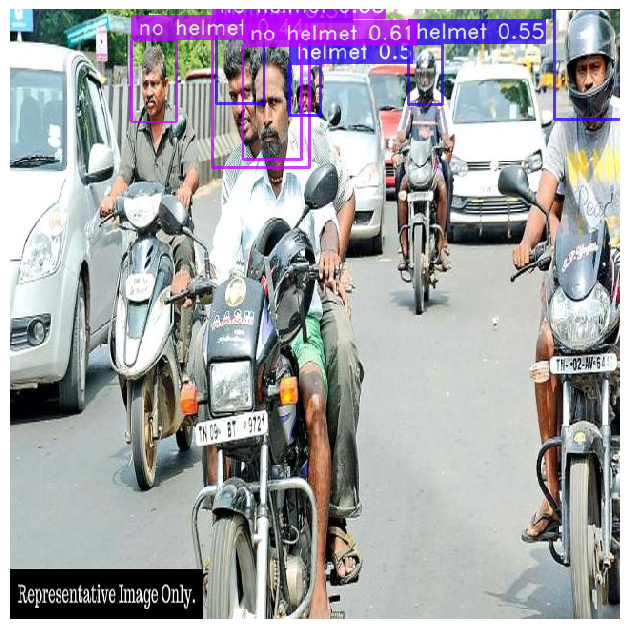

In [13]:
path = "/home/balarcon/Palma/Motorcycle-helmet-1/test/images/bikerider0_jpg.rf.8a92bf51e2bd46dd610393f130b93eab.jpg"

best_model.predict(path, conf=0.3).show()

[2024-07-09 12:11:30] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


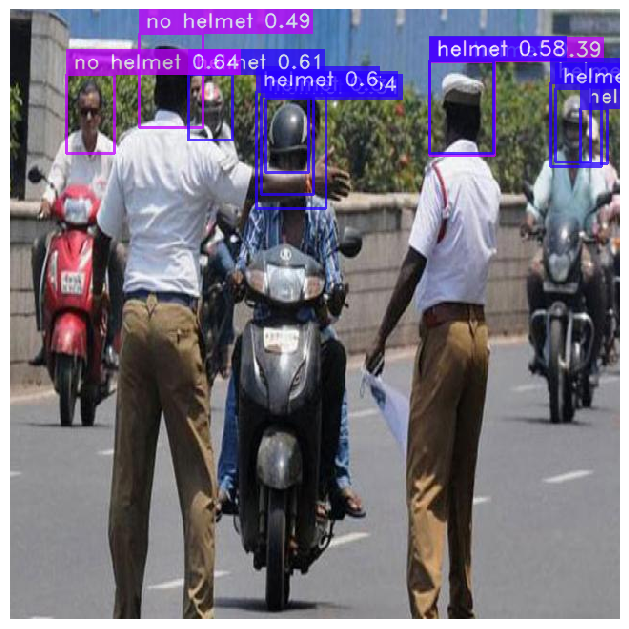

In [15]:
path = "/home/balarcon/Palma/Motorcycle-helmet-1/test/images/bikerider206_jpg.rf.e0d9b8c0ac676a4b7e2687d2aeb3473e.jpg"

best_model.predict(path, conf=0.3).show()

In [24]:
input_video_path = f"/home/balarcon/Palma/video_detection/video_prueba3.mp4"
output_video_path = "/home/balarcon/Palma/video_detection/detections3.mp4"

In [25]:
import torch
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [26]:
best_model.to(device).predict(input_video_path).save(output_video_path)

[aac @ 0x473a3b00] Input buffer exhausted before END element found
Predicting Video: 100%|██████████| 647/647 [00:09<00:00, 71.27it/s]
